## Plotting from pandas DataFrames

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Make a dataframe
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [3]:
np.random.seed(0)
ts = pd.Series(np.random.rand(1000),
          index=pd.date_range("1/1/2023", periods=1000))
ts

2023-01-01    0.548814
2023-01-02    0.715189
2023-01-03    0.602763
2023-01-04    0.544883
2023-01-05    0.423655
                ...   
2025-09-22    0.097676
2025-09-23    0.514922
2025-09-24    0.938412
2025-09-25    0.228647
2025-09-26    0.677141
Freq: D, Length: 1000, dtype: float64

In [4]:
ts1 = ts.cumsum()
ts1

2023-01-01      0.548814
2023-01-02      1.264003
2023-01-03      1.866766
2023-01-04      2.411649
2023-01-05      2.835304
                 ...    
2025-09-22    493.562412
2025-09-23    494.077335
2025-09-24    495.015747
2025-09-25    495.244393
2025-09-26    495.921534
Freq: D, Length: 1000, dtype: float64

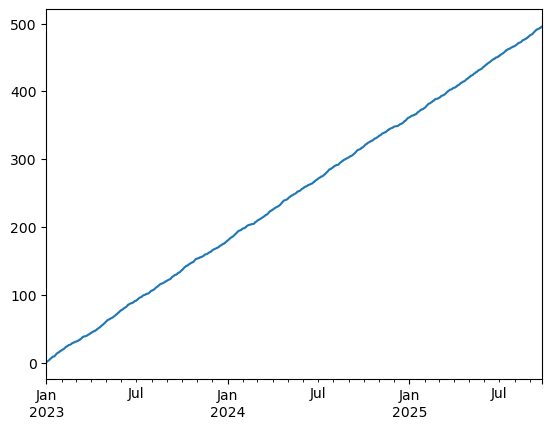

In [5]:
ts1.plot();

In [6]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [7]:
type(car_sales["Price"][0])

str

In [8]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [9]:
car_sales["Sale Date"] = pd.date_range("1/1/2023", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2023-01-01
1,Honda,Red,87899,4,5000,2023-01-02
2,Toyota,Blue,32549,3,7000,2023-01-03
3,BMW,Black,11179,5,22000,2023-01-04
4,Nissan,White,213095,4,3500,2023-01-05
5,Toyota,Green,99213,4,4500,2023-01-06
6,Honda,Blue,45698,4,7500,2023-01-07
7,Honda,Blue,54738,4,7000,2023-01-08
8,Toyota,White,60000,4,6250,2023-01-09
9,Nissan,White,31600,4,9700,2023-01-10


In [10]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


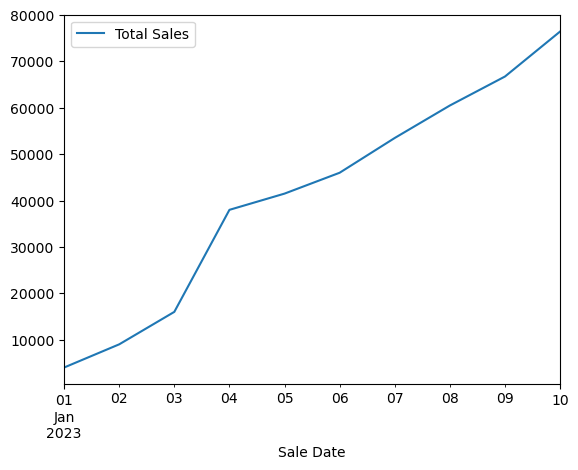

In [11]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

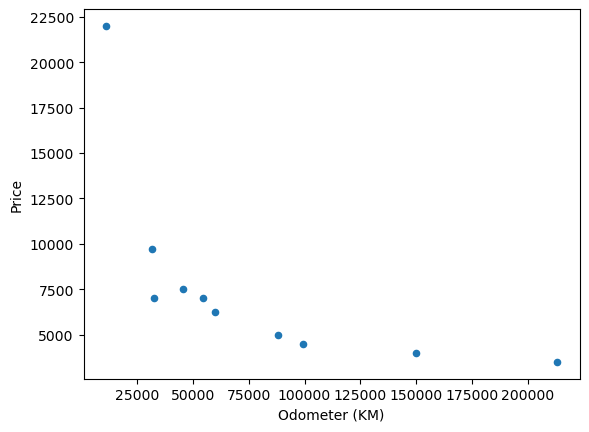

In [12]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [13]:
# How about a bar graph?
np.random.seed(0)
x = np.random.rand(10, 4)
x

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329, 0.94466892],
       [0.52184832, 0.41466194, 0.26455561, 0.77423369],
       [0.45615033, 0.56843395, 0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  , 0.94374808, 0.6818203 ]])

In [14]:
# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.548814,0.715189,0.602763,0.544883
1,0.423655,0.645894,0.437587,0.891773
2,0.963663,0.383442,0.791725,0.528895
3,0.568045,0.925597,0.071036,0.087129
4,0.020218,0.832620,0.778157,0.870012
5,0.978618,0.799159,0.461479,0.780529
6,0.118274,0.639921,0.143353,0.944669
7,0.521848,0.414662,0.264556,0.774234
8,0.456150,0.568434,0.018790,0.617635
9,0.612096,0.616934,0.943748,0.681820


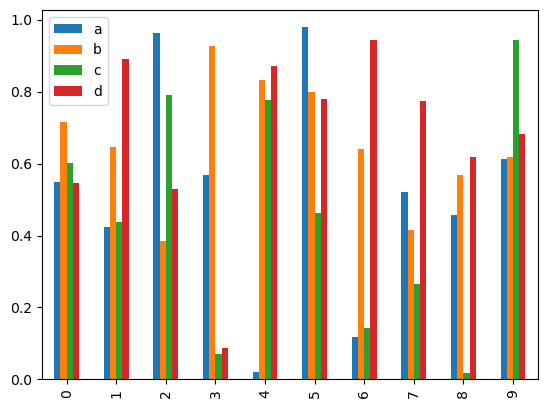

In [15]:
# way 1 to plot from pandas DataFrame
df.plot.bar();

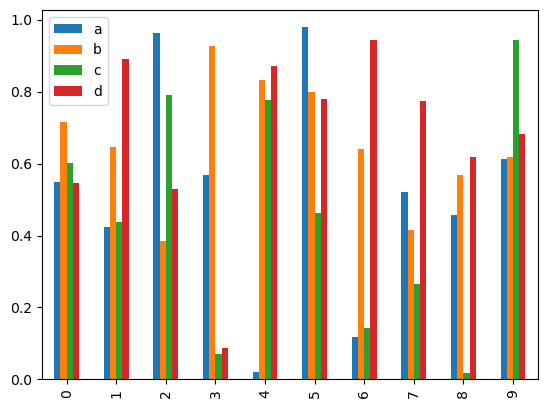

In [16]:
# way 2 to plot from pandas DataFrame
df.plot(kind="bar");

In [17]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


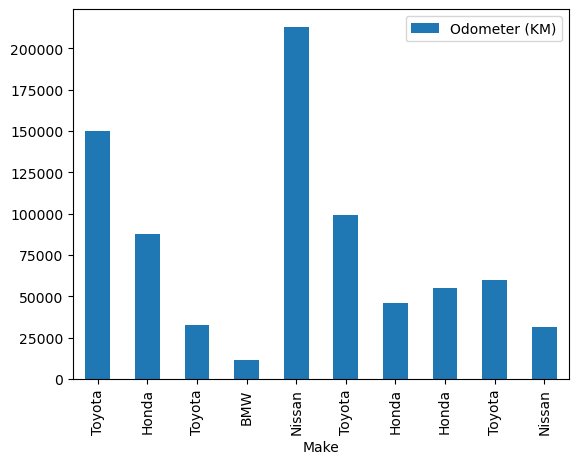

In [18]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

<AxesSubplot: ylabel='Frequency'>

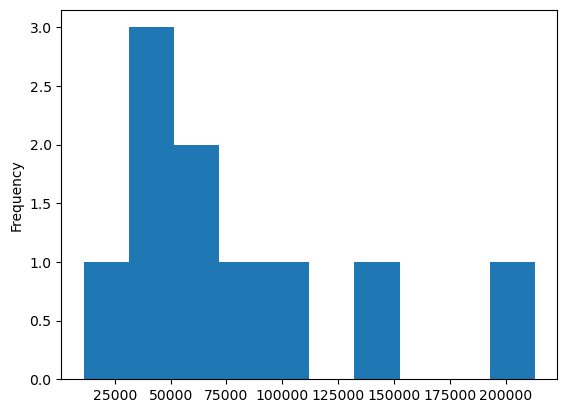

In [19]:
# How about histograms?
car_sales["Odometer (KM)"].plot.hist()

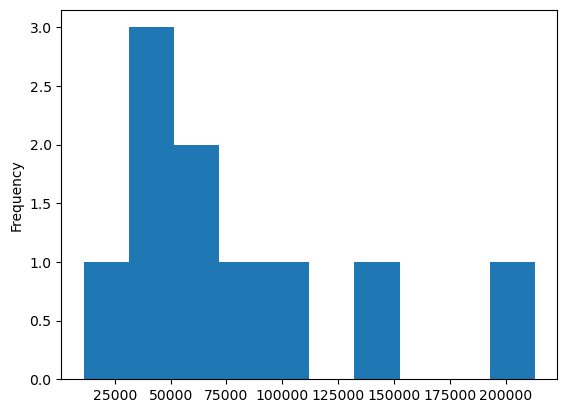

In [20]:
car_sales["Odometer (KM)"].plot(kind="hist");

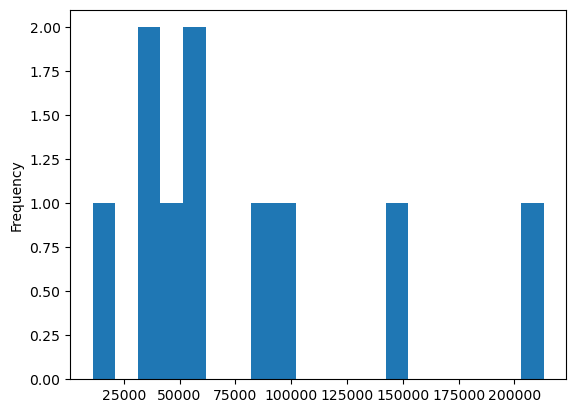

In [21]:
car_sales["Odometer (KM)"].plot.hist(bins=20);